ISHANI JAISWAL E22CSEU0442

In [ ]:
# import the necessary Libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

In [ ]:
# set the param
plt.rc( 'figure', autolayout=True)
plt.rc('image', cmap='magma')
# define the kernel
kernel = tf.constant([[-1, -1, -1],[-1, 8, -1],[-1,-1,-1],])

In [ ]:
# Load the image


image = tf.io.read_file('brain.jpg')

image = tf.io.decode_jpeg(image, channels=1)

image = tf.image.resize(image, size=[300, 300])

In [ ]:
image.shape

TensorShape([300, 300, 1])

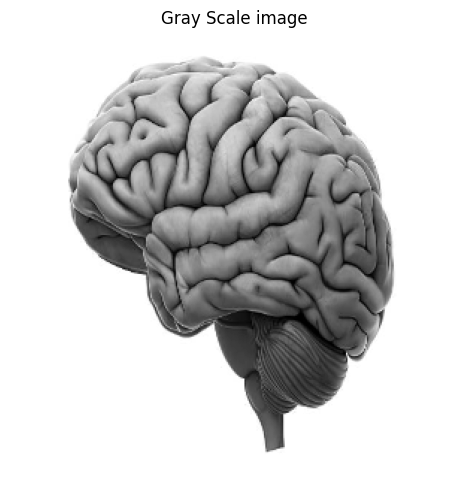

In [ ]:
# plot the image
img = tf. squeeze (image) .numpy ()
plt. figure (figsize= (5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title( 'Gray Scale image')
plt.show();

In [ ]:
# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims (image, axis=0)
kernel = tf.reshape(kernel, [*kernel. shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

In [ ]:
image.shape

TensorShape([1, 300, 300, 1])

In [ ]:
kernel.shape

TensorShape([3, 3, 1, 1])

In [ ]:
# convolution Layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image, filters=kernel,
    strides=1, # or (1, 1)
    padding= 'SAME',
)
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Convolution')

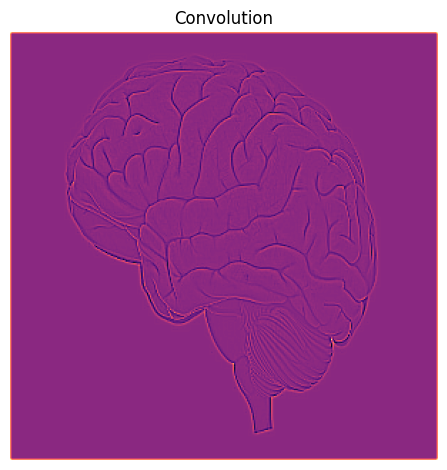

In [ ]:
# Plot the convolved image
plt.imshow(
tf.squeeze(image_filter)
)
plt.axis('off')
plt.title( 'Convolution')

Text(0.5, 1.0, 'Activation')

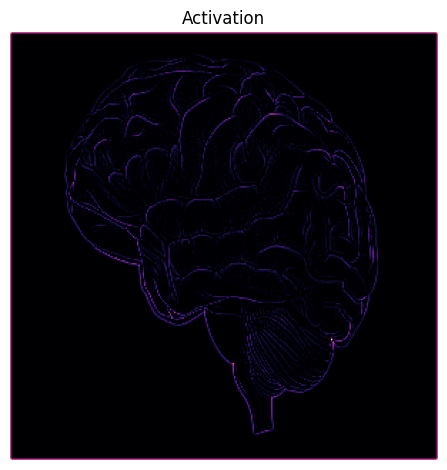

In [ ]:
# activation Layer
relu_fn = tf.nn.relu
# Image detection |
image_detect = relu_fn (image_filter)
#pLt. subplot (1, 3, 2)
plt. imshow(
# Reformat for plotting
tf. squeeze (image_detect)
)
plt.axis('off')
plt.title( 'Activation')

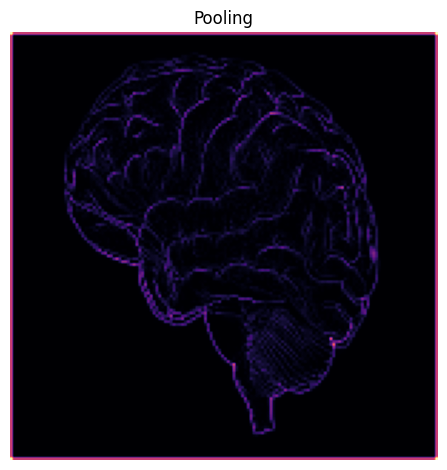

In [ ]:
# PooLing Layer
pool = tf.nn.pool
image_condense = pool (input=image_detect,
window_shape=(2, 2), pooling_type='AVG',
strides=(2, 2), padding= 'SAME',
)
#plt.subplot（1, 3, 3）
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title( 'Pooling')
plt.show()